Used AdaBoost Regression because previously dont know how to approach for Classification Models.
Think this was not in our original plan - JL

# AdaBoost Regression

In [1]:
import re
import io

#General libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

#For AdaBoost implementation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB

In [2]:
# import csv
hdb_model_data = pd.read_csv('hdb_model_data.csv')
hdb_model_data.sample(5)

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
69551,0.2500,0.218750,1.0,1.0,0.917808,0.283690,0.594545,0.0,0.311386
59435,0.1875,0.317708,1.0,1.0,0.876712,0.585015,0.597299,0.0,0.287078
7942,0.0000,0.270833,0.0,0.0,0.522070,0.571113,0.434713,1.0,0.106684
62956,0.0000,0.375000,1.0,1.0,0.491629,0.140980,0.711500,0.0,0.177679
54941,0.1250,0.380208,1.0,1.0,0.547945,0.394563,0.620609,1.0,0.255825


In [3]:
hdb_model_data.dtypes

storey_range                  float64
floor_area_sqm                float64
no.of bto                     float64
resale application            float64
remaining_lease_months        float64
Distance to nearest MRT       float64
Distance to CBD               float64
isMatureEstate                float64
cpi_adjusted_price_per_sqm    float64
dtype: object

In [4]:
hdb_model_data.sample(5)

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
60363,0.4375,0.218750,1.000000,1.0,0.952816,0.104343,0.400253,1.0,0.566459
72590,0.1875,0.270833,1.000000,1.0,0.546423,0.426928,0.598750,1.0,0.248703
37590,0.0625,0.369792,0.505255,0.0,0.430746,0.316205,0.646418,1.0,0.162533
66323,0.0625,0.276042,1.000000,1.0,0.407915,0.085596,0.543926,1.0,0.283314
11784,0.2500,0.307292,0.000000,0.0,0.710807,0.422156,0.466976,0.0,0.132751


In [5]:
X = hdb_model_data.iloc[:,0:8]
y= hdb_model_data.iloc[:,-1]  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Used for loop to find best learning rate from 0.1 to 2.0

In [6]:
#create empty dataframe to store data on learning rate
d = {'Learning Rate': [], 'r2 Score': [], 'mean squared log error': []}
check_lr = pd.DataFrame(d)

#finding the best learning rate from 0.1 to 2.0 
for i in np.arange(0.1, 2.1, 0.1):
    model = AdaBoostRegressor(n_estimators=50,learning_rate=i)

    #Fit the training feature Xs and training label Ys
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    r2 = metrics.r2_score(y_test, y_pred)
    m2le = metrics.mean_squared_log_error(y_test, y_pred)
    
    check_lr = check_lr.append({'Learning Rate':i, 'r2 Score':r2, 'mean squared log error':m2le}, ignore_index=True)
    
check_lr

,Learning Rate,r2 Score,mean squared log error
0,0.1,0.719852,0.002011
1,0.2,0.719010,0.002044
2,0.3,0.718216,0.002064
3,0.4,0.711100,0.002133
4,0.5,0.697749,0.002245
5,0.6,0.696050,0.002264
6,0.7,0.689664,0.002317
7,0.8,0.686411,0.002348
8,0.9,0.698300,0.002255
9,1.0,0.696915,0.002274


In [7]:
#based on above data, best learning rate is 1.7
model = AdaBoostRegressor(n_estimators=50,learning_rate=1.7)

#Fit the training feature Xs and training label Ys
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

AdaBoost Regression evaluation method from the following link:
https://www.projectpro.io/recipes/use-adaboost-classifier-and-regressor-in-python

0.7418700470089069
0.0019465463748620365


C:\Users\jlloh.2020\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cpi_adjusted_price_per_sqm'>

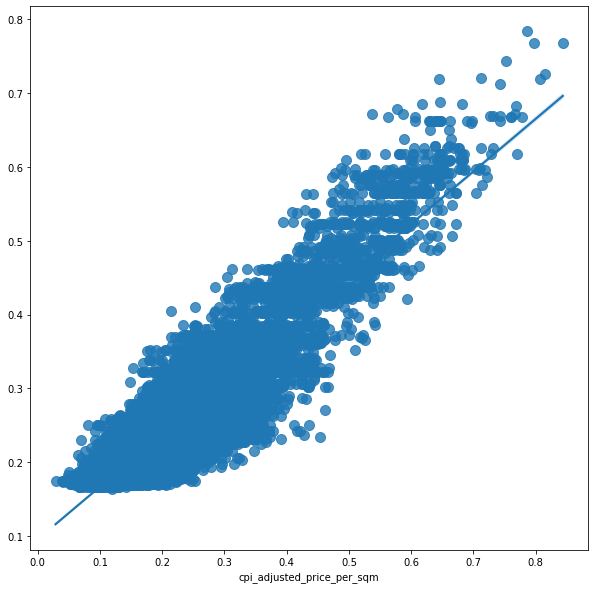

In [8]:
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_log_error(y_test, y_pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})